In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode
plt.rcParams['figure.figsize'] = [10, 6]
np.random.seed(42)

### The game of Snakes and Ladders is a good candidate for analysis with a Markov Chain because of its memorylessness: at a given point in the game, the player's progression from the current square is independent of how they arrived at that square.

### In Markov Chain theory, the probability of a move from square i to square j is given by a transition matrix, T. 
 
### First consider a board with 100 squares and no snakes and no ladders. The player starts off the board, in a square we number 0, so the transiton matrix has dimensions 101×101, where we label the rows i=0,1,2,⋯100 as squares to move from and columns j=0,1,2,⋯100 as squares to move to. The first row the transition matrix therefore represents the probabilities of moving to each square from square 0; the second row represents the probabilities of moving to each square from square 1, and so on. The moves are decided by the roll of a fair, six-sided die so the first few rows of the transition matrix in this case look like:
 
### $$T = \begin{bmatrix} 0 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 0 & 0 & 0 & ... & 0\\ 0 & 0 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 0 & 0 & ... & 0\\ 0 & 0 & 0 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 0 & ... & 0\\ ... \\ ... \\ ... \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & ... & 1/6 & 1/6 & 1/6 & 1/2 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & ... & 1/6 & 1/6 & 2/3 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & ... & 1/6 & 5/6 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & ... & 1 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & ... & 0 \\ \end{bmatrix}$$

### That is, (reading the first row) starting on square 0, there is a zero probability of remaining there, and a 1/6 probability of landing on each of the squares numbered 1–6. Reading the second row gives the probabilities for progression from square 1 (1/6 for each of the destination squares 2–7), and so on.

### Some people play Snakes and Ladders with the requirement that, to win, the player must land exactly on square 100, but those of us who don't feel the need to prolong the game any longer than absolutely necessary allow anyone with a roll that lands on or passes 100 to win. This will change the probabilities in the transition matrix for squares 94–99. For example, from square 97, a roll of 3,4,5 or 6 is sufficient to win. The bottom row of the transition matrix will be full of zeros because there is nowhere to go from square 100.

### The game can be analysed with a row vector, $\vec{\bf{v}}$ with 101 components, representing the probabilities that the player is on each of the squares. Initially, $\vec{\bf{v}}(0)$ is (1,0,0,⋯,0), i.e. the player is certainly on square 0 before the game has begun. Subsequently, $\vec{\bf{v}}$ evolves by the relation
 
### $$\vec{\bf{v}}^{(k+1)} = \vec{\bf{v}}^{(k)}\bf{T}$$

### That is, the probabilities for the next move, k+1, are given by the dot product of the current state vector, v(k) and the transition matrix, T.

[[0.         0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
  0.16666667 0.         0.         0.         0.         0.        ]
 [0.         0.         0.16666667 0.16666667 0.16666667 0.16666667
  0.16666667 0.16666667 0.         0.         0.         0.        ]
 [0.         0.         0.         0.16666667 0.16666667 0.16666667
  0.16666667 0.16666667 0.16666667 0.         0.         0.        ]
 [0.         0.         0.         0.         0.16666667 0.16666667
  0.16666667 0.16666667 0.16666667 0.16666667 0.         0.        ]
 [0.         0.         0.         0.         0.         0.16666667
  0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]]
[0.16666667 0.16666667 0.16666667 0.         0.         0.
 0.        ]
[0.16666667 0.16666667 0.16666667 0.16666667 0.         0.
 0.        ]
[0.16666667 0.16666667 0.16666667 0.16666

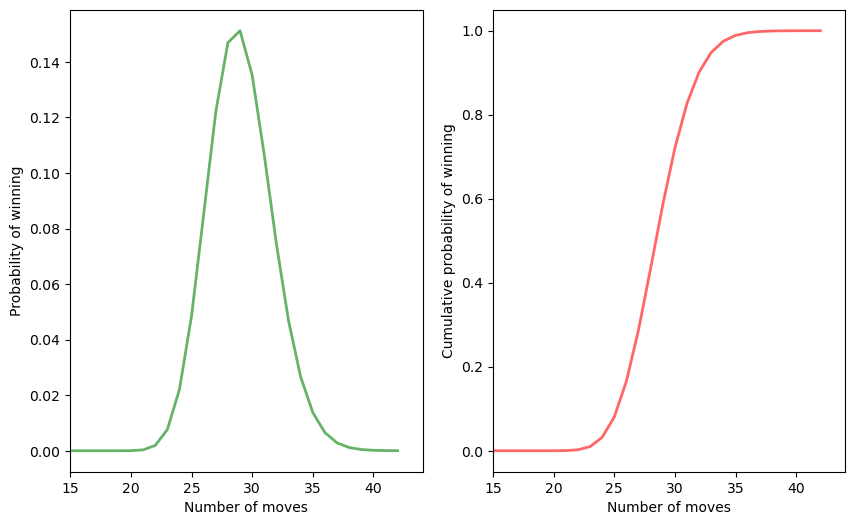

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Set up the transition matrix
T = np.zeros((101, 101))
for i in range(1,101):
    T[i-1,i:i+6] = 1/6

# House rules: you don't need to land on 100, just reach it.
T[95:100,100] += np.linspace(1/6, 5/6, 5)

print(T[0:6,0:12])
# print(T[94:100,94:101])

for i in range(90, 101):
    print(T[i][100 - 6:])
# The player starts at position 0.
v = np.zeros(101)
v[0] = 1

n, P, C = 0, [], []
cumulative_prob = 0
# Update the state vector v until the cumulative probability of winning
# is "effectively" 1
while cumulative_prob < 0.99999:
    n += 1
    v = v.dot(T)
    P.append(v[100])
    cumulative_prob += P[-1]
    C.append(cumulative_prob)
    
mode1 = np.argmax(P)+1
expected = 0
print('modal number of moves:', mode1)
for i in range(len(P)):
    expected += i*P[i]
print("Expected value =", expected)

# Plot the probability of winning as a function of the number of moves
fig, ax = plt.subplots(1,2)
ax[0].plot(np.linspace(1,n,n), P, 'g', lw=2, alpha=0.6)
ax[0].set_xlim(15)
ax[0].set_xlabel('Number of moves')
ax[0].set_ylabel('Probability of winning')
ax[1].plot(np.linspace(1,n,n), C, 'r', lw=2, alpha=0.6)
ax[1].set_xlim(15)
ax[1].set_xlabel('Number of moves')
ax[1].set_ylabel('Cumulative probability of winning')

plt.show()

### The snakes and ladders are added as a list of tuples indicating which squares are joined. Note that the square on which a snake or ladder originates doesn't really need to be included in the transition matrix (since the player can never occupy these positions), but here we keep them for simplicity.


modal number of moves: 19
Expected value = 29.884579182443048


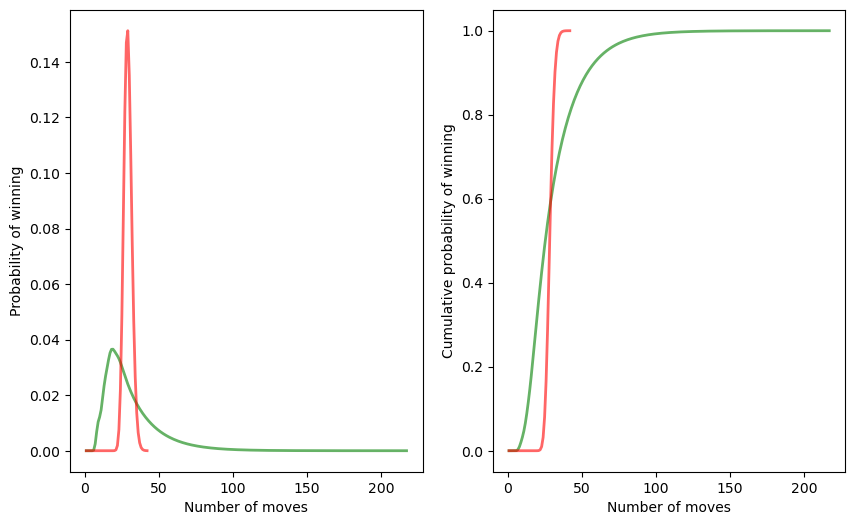

In [56]:
import numpy as np
import matplotlib.pyplot as plt

ladders = [(3,19), (15,37), (22,42), (25,64), (41,73),
           (53,74), (63,86), (76,91), (84,98)]
snakes = [(11,7), (18,13), (28,12), (36,34), (77,16),
          (47,26), (83,39), (92,75), (99,70)]
trans = ladders + snakes

# Set up the transition matrix
T = np.zeros((101, 101))
for i in range(1,101):
    T[i-1,i:i+6] = 1/6

for (i1,i2) in trans:
    iw = np.where(T[:,i1] > 0)
    T[:,i1] = 0
    T[iw,i2] += 1/6

# House rules: you don't need to land on 100, just reach it.
T[95:100,100] += np.linspace(1/6, 5/6, 5)
for snake in snakes:
    T[snake,100] = 0

# The player starts at position 0.
v = np.zeros(101)
v[0] = 1

ns, Ps, Cs = 0, [], []
cumulative_prob = 0
# Update the state vector v until the cumulative probability of winning
# is "effectively" 1
while cumulative_prob < 0.99999:
    ns += 1
    v = v.dot(T)
    Ps.append(v[100])
    cumulative_prob += Ps[-1]
    Cs.append(cumulative_prob)
    
mode1 = np.argmax(Ps)+1
expected = 0
print('modal number of moves:', mode1)
for i in range(len(Ps)):
    expected += i*Ps[i]
print("Expected value =", expected)

# Plot the probability of winning as a function of the number of moves
fig, ax = plt.subplots(1,2)
ax[0].plot(np.linspace(1,ns,ns), Ps, 'g-', lw=2, alpha=0.6, label='Markov')
ax[0].plot(np.linspace(1,n,n), P, 'r-', lw=2, alpha=0.6, label='No snakes or ladders')
ax[0].set_xlabel('Number of moves')
ax[0].set_ylabel('Probability of winning')
ax[1].plot(np.linspace(1,ns,ns), Cs, 'g-', lw=2, alpha=0.6, label='Markov')
ax[1].plot(np.linspace(1,n,n), C, 'r-', lw=2, alpha=0.6, label='No snakes or ladders')
ax[1].set_xlabel('Number of moves')
ax[1].set_ylabel('Cumulative probability of winning')

plt.show()

29
29.0349


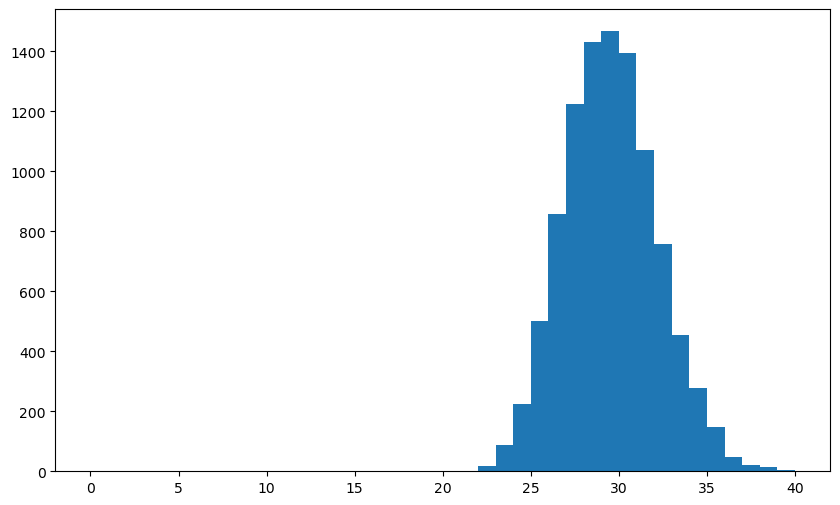

In [57]:
num_sims = 10000
turns = []


for _ in range(num_sims):
    pos = 0
    rolls = 0
    while pos < 100:
        rolls += 1
        roll = np.random.randint(1, 7)
        pos += roll
    turns.append(rolls)
    
print(mode(turns).mode)
print(np.mean(turns))
fig, ax = plt.subplots(1,1)
ax.hist(turns, range(max(turns)))
plt.show()

19
31.0919


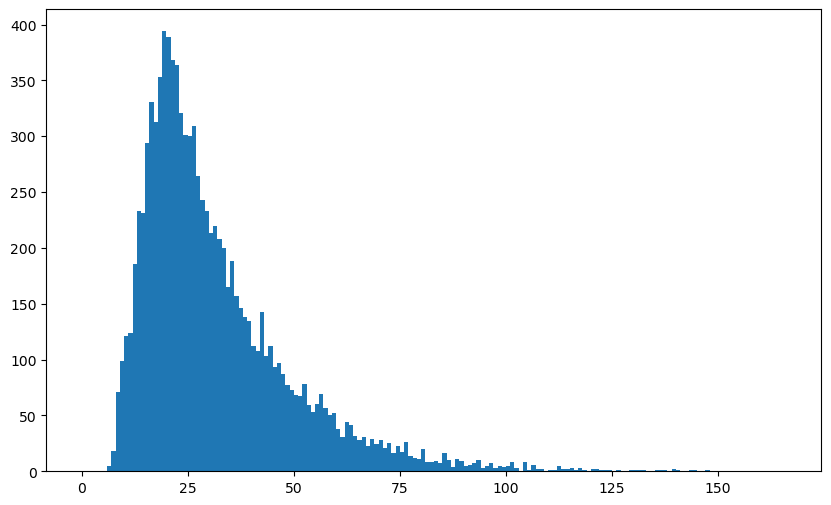

In [58]:
num_sims = 10000
turns = []
ladders = [(3,19), (15,37), (22,42), (25,64), (41,73),
           (53,74), (63,86), (76,91), (84,98)]
snakes = [(11,7), (18,13), (28,12), (36,34), (77,16),
          (47,26), (83,39), (92,75), (99,70)]
trans = ladders + snakes
transitions = {}
for pair in trans:
    transitions[pair[0]] = pair[1]

for _ in range(num_sims):
    pos = 0
    rolls = 0
    while pos < 100:
        rolls += 1
        roll = np.random.randint(1, 7)
        pos += roll
        if pos in transitions.keys():
            pos = transitions[pos]
    turns.append(rolls)
    
print(mode(turns).mode)
print(np.mean(turns))
fig, ax = plt.subplots(1,1)
ax.hist(turns, range(max(turns)))
plt.show()